<a href="https://colab.research.google.com/github/shoabahamed/khanacademy-statistics-and-probability/blob/main/plotting_normal_distribution_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>PRACTICE</h2>
<H3>Create the same plot in excel but with more functions such as making probability guesses such as what is probability of a value being in between a and b</H3>

<H3>In here we will see how probabily density function is created and plot them. We will also know about kdeplots and violinplot</H3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kde
import seaborn as sns

In [ ]:
datas = np.arange(-20, 21, 1)
datas

array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20])

In [ ]:
# Some fuctions which will letter help us compute the normal values
def get_variance(datas):
    datas = np.array(datas)
    mean = np.mean(datas)
    deviation_sum = np.sum(np.square(datas-mean))
    return deviation_sum/len(datas)
    
def get_zscore(datas, miu, std):
    return (datas - miu)/std

The fucntion to get normalized values.

<h4>Normalize means that it fllows the empirical rule or 68-95-99.7 rule meaning in 1st standard deviation above or below the mean will contain 68 percent data and for 2nd standard deviation there will be 95 percent data and soon</h4>

In [ ]:
def get_normal_values(datas, mean=5, variance=25):
    datas = np.array(datas)
    std = np.sqrt(variance)
    zscore = get_zscore(datas, mean, std)

    denominator = np.sqrt(2*np.pi*variance)
    nominator = np.exp(-((zscore*zscore)/2))

    return nominator / denominator


In [ ]:
variance = get_variance(datas)
mean = np.mean(datas)
print(f"The mean of the datas is {mean}")
print(f"The variance of the datas is {variance}")

The mean of the datas is 0.0
The variance of the datas is 140.0


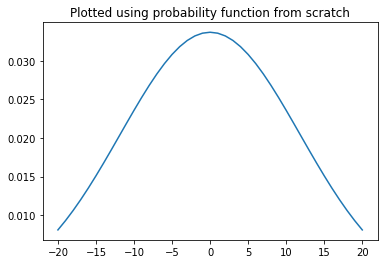

In [ ]:
normal_vals = get_normal_values(datas, mean=0, variance=140) # the mean and variance here is the real values of the data
plt.plot(datas, normal_vals)
plt.title('Plotted using probability function from scratch')
plt.show()

<p>In the plot above the 1st standard deviation below or above contains the 68 percent data. The plot is also known as bell curve which is a special kind of probability density plot</p>

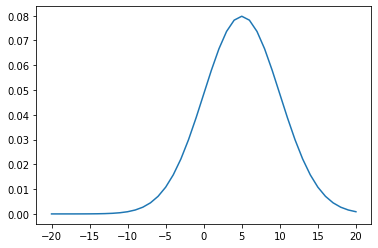

In [ ]:
# different means or variance although the same is almost the same it tell us that most of data are in the second half
normal_vals = get_normal_values(datas, mean=5, variance=25)
plt.plot(datas, normal_vals)
plt.show()

<P>Now lets try to plot the probability density function through scypi</P>

In [ ]:
std = np.sqrt(variance)

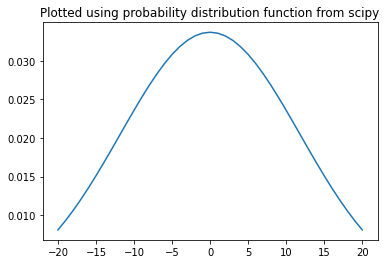

In [ ]:
pdf_values = norm.pdf(datas, mean, std)
plt.plot(datas, pdf_values)
plt.title("Plotted using probability distribution function from scipy")
plt.show()

<p>Now lets plot a gaussian curve. It also follows the empirical rule but looks a little different</p>

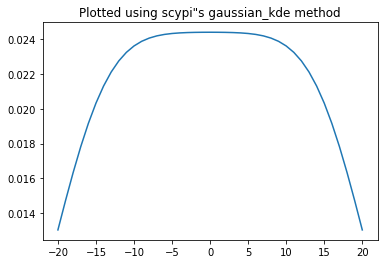

In [ ]:
ked = kde.gaussian_kde(datas)
plt.plot(datas, ked(datas))
plt.title('Plotted using scypi"s gaussian_kde method')
plt.show()

<p>The default of kdeplot in seaborn is also gaussian plot</p>

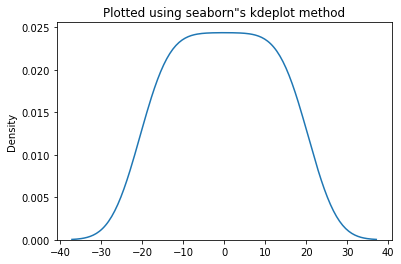

In [ ]:
sns.kdeplot(datas)
plt.title('Plotted using seaborn"s kdeplot method')
plt.show()

<P>So thing main is that whether it is bell curve, kdeplot or gausian plot all of them are just probability density plot. They have different names because of how they looks</p><br>
<p>Where bell curve shows us how the probability density should look like in a range of x values. The kde plot shows us the actual density plot in the given dataset</p>

Now lets see how they look for other real dataset. For this we will use seaborns mpg data

In [4]:
cars = sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
horsepower = cars.horsepower.values

<p>In general sense what probality density plot or kde(kernel density plot)plot is actually just plot where there are lot of bins. So the range of each bins are also very small.<br>
So in sense probability density plot is actuall a histogram</p>

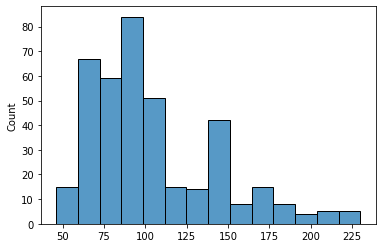

In [ ]:
sns.histplot(horsepower)
plt.show()

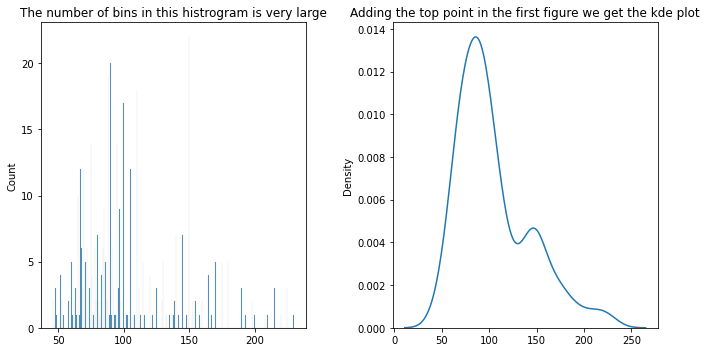

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(horsepower, bins=490)
plt.title('The number of bins in this histrogram is very large')
plt.subplot(1, 2, 2)
sns.kdeplot(horsepower)
plt.title('Adding the top point in the first figure we get the kde plot')
plt.tight_layout()
plt.show()

In [ ]:
range = np.linspace(min(horsepower), max(horsepower), 392)
hp_mean = np.mean(horsepower)
hp_variance = np.var(horsepower)
hp_std = np.sqrt(variance)
norm_values = get_normal_values(horsepower, mean=hp_mean, variance=hp_variance)

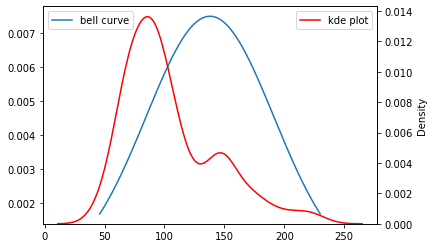

In [ ]:
n_vals = get_normal_values(range, mean=np.mean(range), variance=np.var(range))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range, n_vals, label='bell curve')
sns.kdeplot(horsepower, label='kde plot', color='red')

plt.legend()
ax1.legend(loc='upper left')
plt.show()

<p>From the figure above the bell curve shows how the data should have been distriubted following the empirical rule in the given range of 0/50 to 250. The kde plot tell us how the density really is the given the horsepower datas. <Br>
But no matter it is bell curve or kde plot the area of both of them are 1 or they 100% of all the data</p>

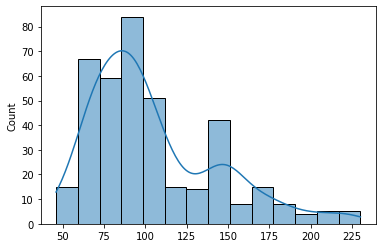

In [ ]:
# shoing that kde plot is acutally a histogram with lot of bins
sns.histplot(horsepower, kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


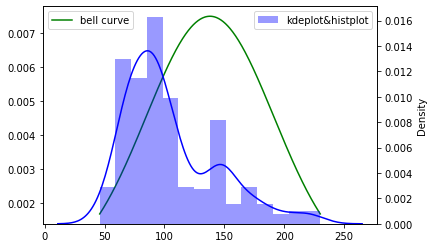

In [ ]:
n_vals = get_normal_values(range, mean=np.mean(range), variance=np.var(range))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range, n_vals, label='bell curve', color='green')
sns.distplot(horsepower, label='kdeplot&histplot', color='blue')

plt.legend()
ax1.legend(loc='upper left')
plt.show()

<p>From the figure above the bell curve shows how the data should have been distriubted following the empirical rule in the given range of 0/50 to 250. The kde plot tell us how the density really is the given the horsepower datas ist also tell us that kde plot is actually just a histogram</p>

<h2>In here we will also learn a little bit about violin plot which is a combination of kdeplot and box plot</h2>

In [16]:
sns.set_style('whitegrid')

In [7]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [12]:
# since 3 and 5 cylinders has very low datset we will only use 4, 6 and 8 cylinders 

cars_new = cars[cars['cylinders'].isin([4, 6, 8])]

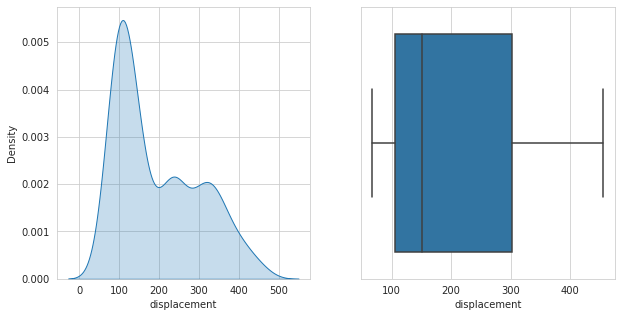

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(cars_new['displacement'], shade=True)
plt.subplot(1, 2, 2)
sns.boxplot(x='displacement', data=cars_new)
plt.show()

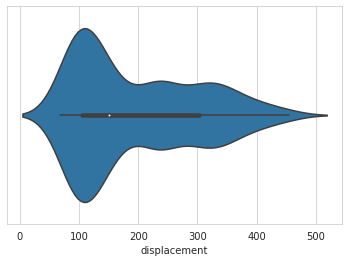

In [24]:
sns.violinplot(x='displacement', data=cars_new)
plt.show()

<p>As you can see violin plot is clearly the combination of kde or kernel density plot and boxplot. <br>
Here it tells that the approximately range of the values is from 75 to 460 also interquartile range and median which is the same box plot.<br> It also shows the kernel desity plot

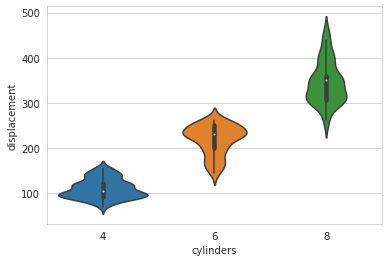

In [31]:
sns.violinplot(y='displacement', x='cylinders', data=cars_new)
plt.show()

<p>We can furter split the data baseed on origin using hue</p>

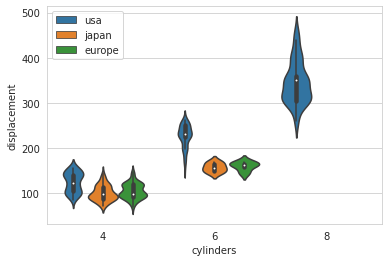

In [35]:
sns.violinplot(y='displacement', x='cylinders', data=cars_new, hue='origin')
plt.legend(loc=2)
plt.show()

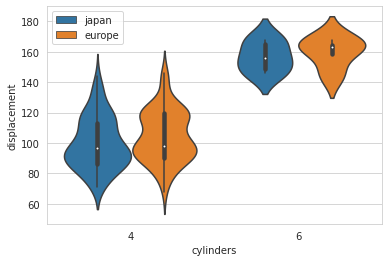

In [36]:
sns.violinplot(y='displacement', x='cylinders', data=cars_new[cars_new.origin.isin(['japan', 'europe'])], 
               hue='origin')
plt.legend(loc=2)
plt.show()

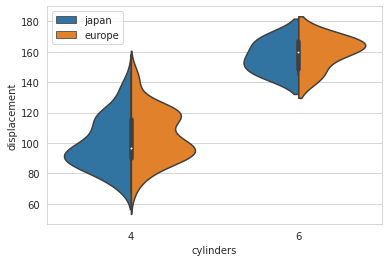

In [37]:
sns.violinplot(y='displacement', x='cylinders', data=cars_new[cars_new.origin.isin(['japan', 'europe'])], 
               hue='origin', split=True)
plt.legend(loc=2)
plt.show()

<p>Although the plot looks much more cleaner this way. It's gets harder to see the boxplot values. To see them we can do this

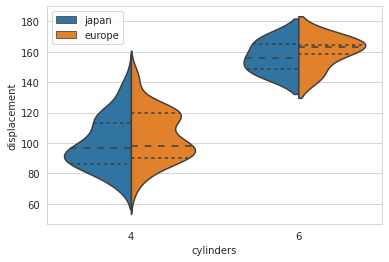

In [39]:
sns.violinplot(y='displacement', x='cylinders', data=cars_new[cars_new.origin.isin(['japan', 'europe'])], 
               hue='origin', split=True, inner='quartiles')
# the 1st, 2nd, 3rd and 4th quarter are shown below
plt.legend(loc=2)
plt.show()

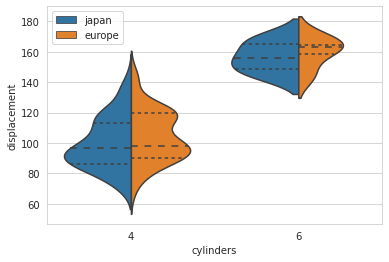

In [43]:
# we can also change the scaling. By default the scale is area which means that the area of of all box plot will be 1.
# we can change it to count. So now the width are based on number of observation
sns.violinplot(y='displacement', x='cylinders', data=cars_new[cars_new.origin.isin(['japan', 'europe'])], 
               hue='origin', split=True, inner='quartiles', scale='count')

plt.legend(loc=2)
plt.show()
# we can see that in 6 cylinders we have more observations or records in in Japan than in europe 

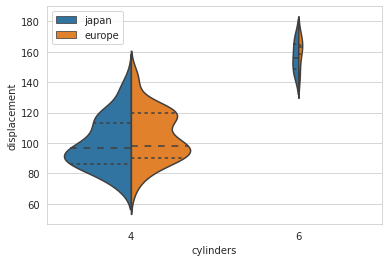

In [42]:
# we can also change the scaling. By default the scale is area which means that the area of of all box plot will be 1.
# we can change it to count. So now the width are based on number of observation
sns.violinplot(y='displacement', x='cylinders', data=cars_new[cars_new.origin.isin(['japan', 'europe'])], 
               hue='origin', split=True, inner='quartiles', scale='count', 
               scale_hue=False ) # telling seaborn to scale first then split the cylinders into different groups

plt.legend(loc=2)
plt.show()
# we can see that we have more observations or records in 4 cylinders than in 6 cylinders 

In [ ]:
# in above case first the cylinders are split into 4 and 6 then they counted. But we can also change that
sns.violinplot(y='displacement', x='cylinders', data=cars_new[cars_new.origin.isin(['japan', 'europe'])], 
               hue='origin', split=True, inner='quartiles', scale='count', )
# the 1st, 2nd, 3rd and 4th quarter are shown below
plt.legend(loc=2)
plt.show()